In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1=pd.read_csv('zomato.csv')

In [3]:
df1.head(1)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   

                                             address   name online_order  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...  Jalsa          Yes   

  book_table   rate  votes                           phone      location  \
0        Yes  4.1/5    775  080 42297555\r\n+91 9743772233  Banashankari   

       rest_type                                         dish_liked  \
0  Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari

In [4]:
df=df1.copy()

In [5]:
df.drop(['url','name','phone','address'],axis=1,inplace=True)

In [7]:
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [9]:
df.drop(['menu_item'],axis=1,inplace=True)

In [10]:
df.head(2)

online_order book_table   rate  votes      location      rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari  Casual Dining   
1          Yes         No  4.1/5    787  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list listed_in(type)  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari

In [11]:
df.isnull().mean()

online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

<Axes: >

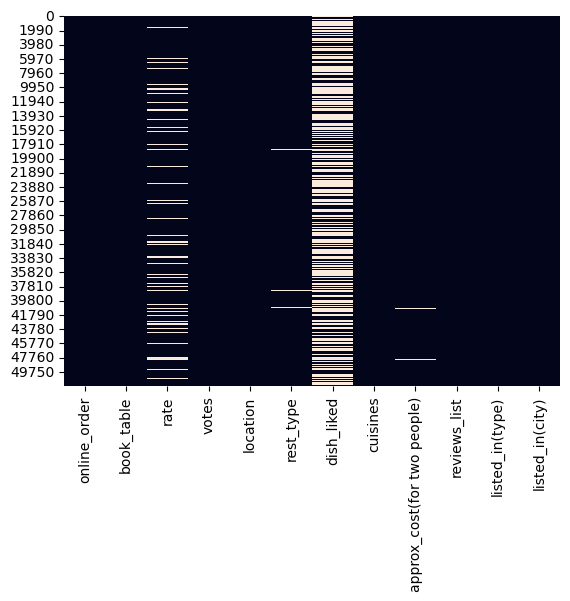

In [12]:
sns.heatmap(df.isnull(), cbar=False)

In [13]:
df.rename(columns={'rate':'Rating out of 5'},inplace=True)

In [14]:
df['Rating out of 5']=df['Rating out of 5'].astype(str)

In [15]:
df['Rating out of 5'] = [val.split('/')[0] for val in df['Rating out of 5']]

In [16]:
df['Rating out of 5'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [17]:
df['Rating out of 5'] = [None if val == "nan" else val for val in df['Rating out of 5']]

In [18]:
df['Rating out of 5'] = [3.9 if val == "-" or val =="NEW" else val for val in df['Rating out of 5']]

In [19]:
df['Rating out of 5']=[float(val) if val is not None else None for val in df['Rating out of 5']]

In [20]:
df['Rating out of 5'].isnull().sum()

7775

In [21]:
df['Rating out of 5'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [22]:
df['Rating out of 5'].value_counts().sort_values(ascending=False)

3.9    6249
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: Rating out of 5, dtype: int64

In [23]:
df['Rating out of 5 binary']=[1 if val>=3.5 else 0 for val in df['Rating out of 5']]

In [24]:
df.head()

online_order book_table  Rating out of 5  votes      location  \
0          Yes        Yes              4.1    775  Banashankari   
1          Yes         No              4.1    787  Banashankari   
2          Yes         No              3.8    918  Banashankari   
3           No         No              3.7     88  Banashankari   
4           No         No              3.8    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list listed_in(type)  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...          Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...          Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...          Buffet   

  listed_in(city)  Rating out of 5 binary  
0    Banashankari                       1  
1    Banashankari                       1  
2    Banashankari                       1  
3    Banashankari                       1  
4    Banashankari                       1

In [25]:
df['Rating out of 5'].mean()

3.710789222156479

In [26]:
df['Rating out of 5'].fillna(df['Rating out of 5'].mean(),inplace=True)

In [27]:
df['Rating out of 5'].isnull().sum()

0

In [28]:
df.groupby(['location'])['Rating out of 5 binary'].count()

location
BTM                  5124
Banashankari          906
Banaswadi             664
Bannerghatta Road    1630
Basavanagudi          684
                     ... 
West Bangalore          6
Whitefield           2144
Wilson Garden         246
Yelahanka               6
Yeshwantpur           119
Name: Rating out of 5 binary, Length: 93, dtype: int64

In [29]:
df.groupby(['location'])['Rating out of 5 binary'].mean()

location
BTM                  0.569477
Banashankari         0.657837
Banaswadi            0.451807
Bannerghatta Road    0.475460
Basavanagudi         0.694444
                       ...   
West Bangalore       0.500000
Whitefield           0.526119
Wilson Garden        0.528455
Yelahanka            0.666667
Yeshwantpur          0.529412
Name: Rating out of 5 binary, Length: 93, dtype: float64

In [30]:
Mean_encoded_subject = df.groupby(['location'])['Rating out of 5 binary'].mean().to_dict()
  
df['location'] =  df['location'].map(Mean_encoded_subject)

In [33]:
df['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [34]:
df['dish_liked']=[str(val).split(', ') for val in df['dish_liked']]

In [38]:
df['dish_liked'][24264]

['Tikka',
 'Biryani',
 'Salad',
 'Pasta',
 'Masala Papad',
 'Palak Paneer',
 'Garlic Naan']

In [40]:
df['dish_liked']
unique_valdish_liked=[]
for val in df['dish_liked']:
    for i in val:
        i=i.strip()
        if i not in unique_valdish_liked:
            unique_valdish_liked.append(i)
        else:
            continue

In [41]:
unique_valdish_liked

['Pasta',
 'Lunch Buffet',
 'Masala Papad',
 'Paneer Lajawab',
 'Tomato Shorba',
 'Dum Biryani',
 'Sweet Corn Soup',
 'Momos',
 'Chocolate Nirvana',
 'Thai Green Curry',
 'Paneer Tikka',
 'Chicken Biryani',
 'Churros',
 'Cannelloni',
 'Minestrone Soup',
 'Hot Chocolate',
 'Pink Sauce Pasta',
 'Salsa',
 'Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 'Gol Gappe',
 'Onion Rings',
 'Kadhai Paneer',
 'Salads',
 'Salad',
 'Roti',
 'Jeera Rice',
 'nan',
 'Farmhouse Pizza',
 'Chocolate Banana',
 'Virgin Mojito',
 'Lime Soda',
 'Prawn Pizza',
 'Pizza',
 'Mocktails',
 'Coffee',
 'Nachos',
 'Sandwiches',
 'Waffles',
 'Coleslaw Sandwich',
 'Choco Waffle',
 'Tacos',
 'Cheese Nachos',
 'Crispy Chicken',
 'Honey Chilli Chicken',
 'Sandwich',
 'Crepe',
 'Peri Fries',
 'Lasagne',
 'Chicken Bbq Wings',
 'Spaghetti',
 'Pancakes',
 'Garlic Bread',
 'Omelette',
 'Ice Tea',
 'Pasta Arrabiata',
 'Hazelnut Cappuccino',
 'Burgers',
 'Hot Chocolate Fudge',
 'Potato Wedges',
 'Mushroom Bruschettas',
 'Jalape

In [43]:
entry_counts_dish_liked = {entry: 0 for entry in unique_valdish_liked}

In [44]:

# Initialize counts for each entry in unique_vallist to 0
entry_counts_dish_liked = {entry: 0 for entry in entry_counts_dish_liked}



# Iterate through the elements in the column list and update counts
for column_list in df['dish_liked']:
    for item in column_list:
        if item in entry_counts_dish_liked:
            entry_counts_dish_liked[item] += 1

# Print the counts for each entry
for entry, count in entry_counts_dish_liked.items():
    print(f"{entry}: {count}")


Pasta: 3409
Lunch Buffet: 410
Masala Papad: 150
Paneer Lajawab: 13
Tomato Shorba: 16
Dum Biryani: 196
Sweet Corn Soup: 136
Momos: 944
Chocolate Nirvana: 4
Thai Green Curry: 65
Paneer Tikka: 564
Chicken Biryani: 1330
Churros: 95
Cannelloni: 11
Minestrone Soup: 48
Hot Chocolate: 776
Pink Sauce Pasta: 11
Salsa: 150
Veg Supreme Pizza: 15
Masala Dosa: 700
Panipuri: 434
Gol Gappe: 41
Onion Rings: 198
Kadhai Paneer: 80
Salads: 1391
Salad: 776
Roti: 866
Jeera Rice: 179
nan: 28078
Farmhouse Pizza: 9
Chocolate Banana: 16
Virgin Mojito: 127
Lime Soda: 142
Prawn Pizza: 24
Pizza: 2737
Mocktails: 1887
Coffee: 1994
Nachos: 1365
Sandwiches: 1676
Waffles: 979
Coleslaw Sandwich: 7
Choco Waffle: 7
Tacos: 111
Cheese Nachos: 19
Crispy Chicken: 88
Honey Chilli Chicken: 23
Sandwich: 887
Crepe: 41
Peri Fries: 66
Lasagne: 155
Chicken Bbq Wings: 64
Spaghetti: 190
Pancakes: 511
Garlic Bread: 418
Omelette: 203
Ice Tea: 107
Pasta Arrabiata: 48
Hazelnut Cappuccino: 31
Burgers: 3024
Hot Chocolate Fudge: 188
Potato W

In [45]:
for i, row in df.iterrows():
    original_values_dish_liked = row['dish_liked']
    new_values_dish_liked = [entry_counts_dish_liked[val] if val in entry_counts_dish_liked else val for val in original_values_dish_liked]
    df.at[i, 'dish_liked'] = new_values_dish_liked

In [46]:
df['dish_liked'][24264]

[70, 2092, 776, 3409, 150, 171, 117]

In [47]:
for i, row in df.iterrows():
    original_values_dish_liked = row['dish_liked']
    new_values_dish_liked = [int(val) for val in original_values_dish_liked]
    df.at[i, 'dish_liked'] = new_values_dish_liked

In [49]:
df['dish_liked_final']=df['dish_liked'].apply(sum)

In [50]:
df.head(5)

online_order book_table  Rating out of 5  votes  location  \
0          Yes        Yes              4.1    775  0.657837   
1          Yes         No              4.1    787  0.657837   
2          Yes         No              3.8    918  0.657837   
3           No         No              3.7     88  0.657837   
4           No         No              3.8    166  0.694444   

             rest_type                          dish_liked  \
0        Casual Dining  [3409, 410, 150, 13, 16, 196, 136]   
1        Casual Dining   [944, 410, 4, 65, 564, 196, 1330]   
2  Cafe, Casual Dining      [95, 11, 48, 776, 11, 150, 15]   
3          Quick Bites                               [700]   
4        Casual Dining                           [434, 41]   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list listed_in(type)  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...          Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...          Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...          Buffet   

  listed_in(city)  Rating out of 5 binary  dish_liked_final  
0    Banashankari                       1              4330  
1    Banashankari                       1              3513  
2    Banashankari                       1              1106  
3    Banashankari                       1               700  
4    Banashankari                       1               475

In [51]:
df.drop(['dish_liked'],axis=1,inplace=True)

In [52]:
df['rest_type']=df1['rest_type']

In [53]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [54]:
df['rest_type']=[str(val).split(', ') for val in df['rest_type']]

In [55]:
df['rest_type'][24312]

['Quick Bites', 'Meat Shop']

In [56]:
df['rest_type']
unique_vallist=[]
for val in df['rest_type']:
    for i in val:
        i=i.strip()
        if i not in unique_vallist:
            unique_vallist.append(i)
        else:
            continue

In [57]:
unique_vallist

['Casual Dining',
 'Cafe',
 'Quick Bites',
 'Delivery',
 'Mess',
 'Dessert Parlor',
 'Bakery',
 'Pub',
 'Takeaway',
 'Fine Dining',
 'Beverage Shop',
 'Sweet Shop',
 'Bar',
 'Confectionery',
 'Kiosk',
 'Food Truck',
 'Microbrewery',
 'Lounge',
 'Food Court',
 'nan',
 'Dhaba',
 'Club',
 'Irani Cafee',
 'Bhojanalya',
 'Pop Up',
 'Meat Shop']

In [58]:
entry_counts = {entry: 0 for entry in unique_vallist}
entry_counts

{'Casual Dining': 0,
 'Cafe': 0,
 'Quick Bites': 0,
 'Delivery': 0,
 'Mess': 0,
 'Dessert Parlor': 0,
 'Bakery': 0,
 'Pub': 0,
 'Takeaway': 0,
 'Fine Dining': 0,
 'Beverage Shop': 0,
 'Sweet Shop': 0,
 'Bar': 0,
 'Confectionery': 0,
 'Kiosk': 0,
 'Food Truck': 0,
 'Microbrewery': 0,
 'Lounge': 0,
 'Food Court': 0,
 'nan': 0,
 'Dhaba': 0,
 'Club': 0,
 'Irani Cafee': 0,
 'Bhojanalya': 0,
 'Pop Up': 0,
 'Meat Shop': 0}

In [59]:


# Initialize counts for each entry in unique_vallist to 0
entry_counts = {entry: 0 for entry in unique_vallist}



# Iterate through the elements in the column list and update counts
for column_list in df['rest_type']:
    for item in column_list:
        if item in entry_counts:
            entry_counts[item] += 1

# Print the counts for each entry
for entry, count in entry_counts.items():
    print(f"{entry}: {count}")


Casual Dining: 13057
Cafe: 5074
Quick Bites: 20639
Delivery: 4641
Mess: 274
Dessert Parlor: 3211
Bakery: 1998
Pub: 950
Takeaway: 2157
Fine Dining: 405
Beverage Shop: 1471
Sweet Shop: 745
Bar: 2457
Confectionery: 47
Kiosk: 192
Food Truck: 84
Microbrewery: 390
Lounge: 555
Food Court: 765
nan: 227
Dhaba: 40
Club: 41
Irani Cafee: 15
Bhojanalya: 3
Pop Up: 2
Meat Shop: 4


In [60]:
entry_counts

{'Casual Dining': 13057,
 'Cafe': 5074,
 'Quick Bites': 20639,
 'Delivery': 4641,
 'Mess': 274,
 'Dessert Parlor': 3211,
 'Bakery': 1998,
 'Pub': 950,
 'Takeaway': 2157,
 'Fine Dining': 405,
 'Beverage Shop': 1471,
 'Sweet Shop': 745,
 'Bar': 2457,
 'Confectionery': 47,
 'Kiosk': 192,
 'Food Truck': 84,
 'Microbrewery': 390,
 'Lounge': 555,
 'Food Court': 765,
 'nan': 227,
 'Dhaba': 40,
 'Club': 41,
 'Irani Cafee': 15,
 'Bhojanalya': 3,
 'Pop Up': 2,
 'Meat Shop': 4}

In [61]:
for i, row in df.iterrows():
    original_values = row['rest_type']
    new_values = [entry_counts[val] if val in entry_counts else val for val in original_values]
    df.at[i, 'rest_type'] = new_values

In [62]:
df['rest_type'][24312]

[20639, 4]

In [63]:
for i, row in df.iterrows():
    original_values = row['rest_type']
    new_values = [int(val) for val in original_values]
    df.at[i, 'rest_type'] = new_values

In [64]:
df['rest_type_final']=df['rest_type'].apply(sum)

In [65]:
df.drop(['rest_type'],axis=1,inplace=True)

In [66]:
df.isnull().mean()

online_order                   0.000000
book_table                     0.000000
Rating out of 5                0.000000
votes                          0.000000
location                       0.000406
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
Rating out of 5 binary         0.000000
dish_liked_final               0.000000
rest_type_final                0.000000
dtype: float64

In [67]:
df['location'].isnull().sum()

21

In [68]:
df['location'].mean()

0.6275533890436398

In [69]:
df['location'].fillna(df['location'].mean(),inplace=True)

In [70]:
df['cuisines'].unique

<bound method Series.unique of 0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object>

In [71]:
df['cuisines']=[str(val).split(', ') for val in df['cuisines']]

In [72]:
df['cuisines']
unique_cuisinelist=[]
for val in df['cuisines']:
    for i in val:
        i=i.strip()
        if i not in unique_cuisinelist:
            unique_cuisinelist.append(i)
        else:
            continue

In [73]:
unique_cuisinelist

['North Indian',
 'Mughlai',
 'Chinese',
 'Thai',
 'Cafe',
 'Mexican',
 'Italian',
 'South Indian',
 'Rajasthani',
 'Andhra',
 'Pizza',
 'Continental',
 'Momos',
 'Beverages',
 'Fast Food',
 'American',
 'French',
 'European',
 'Bakery',
 'Burger',
 'Desserts',
 'Biryani',
 'Street Food',
 'Rolls',
 'Ice Cream',
 'Healthy Food',
 'Salad',
 'Asian',
 'Korean',
 'Indonesian',
 'Japanese',
 'Goan',
 'Seafood',
 'Kebab',
 'Steak',
 'Mithai',
 'Iranian',
 'Sandwich',
 'Juices',
 'Mangalorean',
 'Vietnamese',
 'Hyderabadi',
 'Bengali',
 'Arabian',
 'BBQ',
 'Tea',
 'Afghani',
 'Lebanese',
 'Finger Food',
 'Tibetan',
 'nan',
 'Charcoal Chicken',
 'Middle Eastern',
 'Mediterranean',
 'Wraps',
 'Kerala',
 'Oriya',
 'Bihari',
 'Roast Chicken',
 'Maharashtrian',
 'Bohri',
 'African',
 'Nepalese',
 'Turkish',
 'Tamil',
 'Tex-Mex',
 'Belgian',
 'Gujarati',
 'South American',
 'Konkan',
 'Drinks Only',
 'Awadhi',
 'Chettinad',
 'Coffee',
 'Indian',
 'Afghan',
 'Modern Indian',
 'Lucknowi',
 'Australi

In [74]:
cuisine_counts = {entry: 0 for entry in unique_cuisinelist}
cuisine_counts

{'North Indian': 0,
 'Mughlai': 0,
 'Chinese': 0,
 'Thai': 0,
 'Cafe': 0,
 'Mexican': 0,
 'Italian': 0,
 'South Indian': 0,
 'Rajasthani': 0,
 'Andhra': 0,
 'Pizza': 0,
 'Continental': 0,
 'Momos': 0,
 'Beverages': 0,
 'Fast Food': 0,
 'American': 0,
 'French': 0,
 'European': 0,
 'Bakery': 0,
 'Burger': 0,
 'Desserts': 0,
 'Biryani': 0,
 'Street Food': 0,
 'Rolls': 0,
 'Ice Cream': 0,
 'Healthy Food': 0,
 'Salad': 0,
 'Asian': 0,
 'Korean': 0,
 'Indonesian': 0,
 'Japanese': 0,
 'Goan': 0,
 'Seafood': 0,
 'Kebab': 0,
 'Steak': 0,
 'Mithai': 0,
 'Iranian': 0,
 'Sandwich': 0,
 'Juices': 0,
 'Mangalorean': 0,
 'Vietnamese': 0,
 'Hyderabadi': 0,
 'Bengali': 0,
 'Arabian': 0,
 'BBQ': 0,
 'Tea': 0,
 'Afghani': 0,
 'Lebanese': 0,
 'Finger Food': 0,
 'Tibetan': 0,
 'nan': 0,
 'Charcoal Chicken': 0,
 'Middle Eastern': 0,
 'Mediterranean': 0,
 'Wraps': 0,
 'Kerala': 0,
 'Oriya': 0,
 'Bihari': 0,
 'Roast Chicken': 0,
 'Maharashtrian': 0,
 'Bohri': 0,
 'African': 0,
 'Nepalese': 0,
 'Turkish': 0,


In [75]:


# Initialize counts for each entry in unique_vallist to 0
cuisine_counts = {entry: 0 for entry in unique_cuisinelist}



# Iterate through the elements in the column list and update counts
for column_list in df['cuisines']:
    for item in column_list:
        if item in cuisine_counts:
            cuisine_counts[item] += 1

# Print the counts for each entry
for entry, count in cuisine_counts.items():
    print(f"{entry}: {count}")


North Indian: 21085
Mughlai: 1570
Chinese: 15547
Thai: 1000
Cafe: 5303
Mexican: 539
Italian: 3389
South Indian: 8644
Rajasthani: 183
Andhra: 1760
Pizza: 2073
Continental: 5765
Momos: 1276
Beverages: 4747
Fast Food: 8096
American: 1461
French: 87
European: 715
Bakery: 2840
Burger: 2009
Desserts: 5633
Biryani: 6492
Street Food: 2595
Rolls: 1470
Ice Cream: 1774
Healthy Food: 917
Salad: 1138
Asian: 1295
Korean: 143
Indonesian: 101
Japanese: 349
Goan: 114
Seafood: 1810
Kebab: 1036
Steak: 573
Mithai: 1027
Iranian: 29
Sandwich: 877
Juices: 1144
Mangalorean: 688
Vietnamese: 172
Hyderabadi: 330
Bengali: 575
Arabian: 1099
BBQ: 736
Tea: 395
Afghani: 8
Lebanese: 175
Finger Food: 1219
Tibetan: 349
nan: 45
Charcoal Chicken: 88
Middle Eastern: 106
Mediterranean: 555
Wraps: 56
Kerala: 1454
Oriya: 135
Bihari: 92
Roast Chicken: 21
Maharashtrian: 139
Bohri: 6
African: 17
Nepalese: 87
Turkish: 92
Tamil: 7
Tex-Mex: 52
Belgian: 4
Gujarati: 102
South American: 20
Konkan: 81
Drinks Only: 11
Awadhi: 29
Chettin

In [76]:
for i, row in df.iterrows():
    original_values = row['cuisines']
    new_values = [cuisine_counts[val] if val in cuisine_counts else val for val in original_values]
    df.at[i, 'cuisines'] = new_values

In [77]:
for i, row in df.iterrows():
    original_values = row['cuisines']
    new_values = [int(val) for val in original_values]
    df.at[i, 'cuisines'] = new_values

In [78]:
df['cuisines_final']=df['cuisines'].apply(sum)

In [79]:
df.drop(['cuisines'],axis=1,inplace=True)

In [80]:
df.head(5)

online_order book_table  Rating out of 5  votes  location  \
0          Yes        Yes              4.1    775  0.657837   
1          Yes         No              4.1    787  0.657837   
2          Yes         No              3.8    918  0.657837   
3           No         No              3.7     88  0.657837   
4           No         No              3.8    166  0.694444   

  approx_cost(for two people)  \
0                         800   
1                         800   
2                         800   
3                         300   
4                         600   

                                        reviews_list listed_in(type)  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...          Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...          Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...          Buffet   

  listed_in(city)  Rating out of 5 binary  dish_liked_final  rest_type_final  \
0    Banashankari                       1              4330            13057   
1    Banashankari                       1              3513            13057   
2    Banashankari                       1              1106            18131   
3    Banashankari                       1               700            20639   
4    Banashankari                       1               475            13057   

   cuisines_final  
0           38202  
1           37632  
2            9231  
3           29729  
4           21268

In [81]:
df['approx_cost(for two people)']=df1['approx_cost(for two people)']

In [82]:
df['approx_cost(for two people)'].isnull().sum()

346

In [83]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [84]:
df['approx_cost(for two people)']=df1['approx_cost(for two people)']

In [85]:
df['approx_cost(for two people)']=[str(val) for val in df['approx_cost(for two people)']]

In [86]:
df['approx_cost(for two people)']=[val.replace(',','') for val in df['approx_cost(for two people)']]

In [87]:
df['approx_cost(for two people)']=[int(val) if val!="nan" else val for val in df['approx_cost(for two people)']]

In [88]:
df['approx_cost(for two people)']=[None if val=="nan" else val for val in df['approx_cost(for two people)']]

In [89]:
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(),inplace=True)

In [90]:
df['approx_cost(for two people)'].isnull().sum()

0

In [91]:
df.columns

Index(['online_order', 'book_table', 'Rating out of 5', 'votes', 'location',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Rating out of 5 binary', 'dish_liked_final',
       'rest_type_final', 'cuisines_final'],
      dtype='object')

In [92]:
df.isnull().sum()

online_order                   0
book_table                     0
Rating out of 5                0
votes                          0
location                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
Rating out of 5 binary         0
dish_liked_final               0
rest_type_final                0
cuisines_final                 0
dtype: int64

In [93]:
df['online_order'].shape

(51717,)

In [94]:
x=pd.get_dummies(df['online_order'])
x

No  Yes
0       0    1
1       0    1
2       0    1
3       1    0
4       1    0
...    ..  ...
51712   1    0
51713   1    0
51714   1    0
51715   1    0
51716   1    0

[51717 rows x 2 columns]

In [95]:
df['online_order']=x['Yes']

In [96]:
y=pd.get_dummies(df['book_table'])
df['book_table']=y['Yes']

In [97]:
list(df.columns)

['online_order',
 'book_table',
 'Rating out of 5',
 'votes',
 'location',
 'approx_cost(for two people)',
 'reviews_list',
 'listed_in(type)',
 'listed_in(city)',
 'Rating out of 5 binary',
 'dish_liked_final',
 'rest_type_final',
 'cuisines_final']

In [98]:
df.shape

(51717, 13)

In [99]:
list(df.columns)

['online_order',
 'book_table',
 'Rating out of 5',
 'votes',
 'location',
 'approx_cost(for two people)',
 'reviews_list',
 'listed_in(type)',
 'listed_in(city)',
 'Rating out of 5 binary',
 'dish_liked_final',
 'rest_type_final',
 'cuisines_final']

In [100]:
df['listed_in(type)'].value_counts().sort_values(ascending=False)

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [101]:
df.groupby(['listed_in(type)'])['Rating out of 5 binary'].count()
df.groupby(['listed_in(type)'])['Rating out of 5 binary'].mean()
Mean_encoded_subject = df.groupby(['listed_in(type)'])['Rating out of 5 binary'].mean().to_dict()
  
df['listed_in(type)'] =  df['listed_in(type)'].map(Mean_encoded_subject)

In [102]:
df.columns

Index(['online_order', 'book_table', 'Rating out of 5', 'votes', 'location',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Rating out of 5 binary', 'dish_liked_final',
       'rest_type_final', 'cuisines_final'],
      dtype='object')

In [103]:
df.groupby(['listed_in(city)'])['Rating out of 5 binary'].count()
df.groupby(['listed_in(city)'])['Rating out of 5 binary'].mean()
Mean_encoded_subject = df.groupby(['listed_in(city)'])['Rating out of 5 binary'].mean().to_dict()
  
df['listed_in(city)'] =  df['listed_in(city)'].map(Mean_encoded_subject)

In [104]:
df.columns

Index(['online_order', 'book_table', 'Rating out of 5', 'votes', 'location',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Rating out of 5 binary', 'dish_liked_final',
       'rest_type_final', 'cuisines_final'],
      dtype='object')

In [105]:
df['cuisines_final']=[val/10000 for val in df['cuisines_final']]
df['rest_type_final']=[val/10000 for val in df['rest_type_final']]

In [106]:
x=df['reviews_list'][0]
x

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [107]:
x=eval(x)

In [108]:
x=[(t[1],) for t in x]

In [109]:
x= [t[0].replace('RATED\n  ', '') for t in x]

In [110]:
x[1]

'I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'

In [111]:
x = ''.join(x)

In [112]:
x

'A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheersIts a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Anyways we ordered ala carte items which took ages to come. 

In [113]:
x.replace('\n','')

'A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.CheersIts a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Anyways we ordered ala carte items which took ages to come. Fo

In [114]:
df['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [115]:
import ast  # Import the ast module

def process_reviews(reviews_list):
    # Use ast.literal_eval() for safe evaluation of list literals
    reviews_list = ast.literal_eval(reviews_list.strip())
    
    # Remove 'RATED\n  ' from the first string in each tuple
    reviews_list = [(t[1],) for t in reviews_list]
    reviews_list = [t[0].replace('RATED\n  ', '') for t in reviews_list]
    
    # Concatenate all the strings and remove newline characters
    concatenated_reviews = ''.join(reviews_list)
    cleaned_reviews = concatenated_reviews.replace('\n', '')
    
    return cleaned_reviews

# Apply the custom function to the "reviews_list" column
df['reviews_list'] = df['reviews_list'].apply(process_reviews)






In [116]:
df['reviews_list'][1253]

"Located in Bhagyanagar near the bus stop. Easily identifiable.Ambience: looks beautiful from outside and well as inside with greens around and tree house/pent house. Many seats are available and is peaceful. Usually ,the place isn't busy.Food: 1) Shezwan fried rice was not up to the mark and was oily.2)Baby corn Manchurian was very tasty and spicy. Must try.3) French fries was was okay okay, was served with fries and chilli powder was sprinkled on it.4) veg friend Momos, was very crispy and hard given with red spicy chutney.Service: was really bad and staff takes much time to serve the food."

In [117]:
x=x.replace('.','')

In [118]:
x

'A beautiful place to dine inThe interiors take you back to the Mughal era The lightings are just perfectWe went there on the occasion of Christmas and so they had only limited items available But the taste and service was not compromised at allThe only complaint is that the breads could have been betterWould surely like to come here againI was here for dinner with my family on a weekday The restaurant was completely empty Ambience is good with some good old hindi music Seating arrangement are good too We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha Food was fresh and good, service is good too Good for family hangout\nCheersIts a restaurant near to Banashankari BDA Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet On inquiring they said this place is mostly visited by vegetarians Anyways we ordered ala carte items which took ages to come Food was ok ok Def

In [119]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [120]:
import gensim
from gensim.models import Word2Vec , KeyedVectors


In [121]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')
vec_king=wv['king']

In [122]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [128]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [129]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['reviews_list'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review]
    review=' '.join(review)
    corpus.append(review)

In [130]:
len(corpus)

51717

In [131]:
words=[]
for sent in corpus:
    value_list = sent.split()
    words.append(value_list)

In [132]:
words

[['a',
  'beautiful',
  'place',
  'to',
  'dine',
  'in',
  'the',
  'interior',
  'take',
  'you',
  'back',
  'to',
  'the',
  'mughal',
  'era',
  'the',
  'lighting',
  'are',
  'just',
  'perfect',
  'we',
  'went',
  'there',
  'on',
  'the',
  'occasion',
  'of',
  'christmas',
  'and',
  'so',
  'they',
  'had',
  'only',
  'limited',
  'item',
  'available',
  'but',
  'the',
  'taste',
  'and',
  'service',
  'wa',
  'not',
  'compromised',
  'at',
  'all',
  'the',
  'only',
  'complaint',
  'is',
  'that',
  'the',
  'bread',
  'could',
  'have',
  'been',
  'better',
  'would',
  'surely',
  'like',
  'to',
  'come',
  'here',
  'again',
  'i',
  'wa',
  'here',
  'for',
  'dinner',
  'with',
  'my',
  'family',
  'on',
  'a',
  'weekday',
  'the',
  'restaurant',
  'wa',
  'completely',
  'empty',
  'ambience',
  'is',
  'good',
  'with',
  'some',
  'good',
  'old',
  'hindi',
  'music',
  'seating',
  'arrangement',
  'are',
  'good',
  'too',
  'we',
  'ordered',
  'm

In [133]:
len(words)

51717

In [134]:
model=gensim.models.Word2Vec(words)

In [135]:
model.wv.index_to_key

['the',
 'and',
 'a',
 'wa',
 'to',
 'is',
 'it',
 'i',
 'of',
 'place',
 'food',
 'for',
 'good',
 'in',
 'with',
 'this',
 'we',
 'they',
 'but',
 'you',
 'have',
 'very',
 'not',
 'on',
 'are',
 'chicken',
 'service',
 'had',
 'that',
 'were',
 's',
 'ambience',
 'ordered',
 'my',
 'here',
 'taste',
 't',
 'one',
 'their',
 'great',
 'so',
 'all',
 'time',
 'which',
 'really',
 'also',
 'at',
 'try',
 'be',
 'from',
 'there',
 'nice',
 'too',
 'like',
 'just',
 'staff',
 'visit',
 'best',
 'if',
 'can',
 'restaurant',
 'well',
 'pizza',
 'some',
 'must',
 'amazing',
 'would',
 'will',
 'order',
 'out',
 'veg',
 'dish',
 'friend',
 'ha',
 'more',
 'an',
 'your',
 'go',
 'experience',
 'u',
 'biryani',
 'been',
 'tried',
 'menu',
 'price',
 'only',
 'up',
 'get',
 'quality',
 'loved',
 'no',
 'me',
 'drink',
 'or',
 'again',
 'overall',
 'love',
 'when',
 'about',
 'tasty',
 'delicious',
 'even',
 'other',
 'starter',
 'by',
 'friendly',
 'quantity',
 'rice',
 'quite',
 'much',
 'defi

In [136]:
model.corpus_count

51717

In [137]:
model.epochs

5

In [138]:
model.wv.similar_by_word('restaurant')

[('hotel', 0.8356720209121704),
 ('place', 0.7470178008079529),
 ('outlet', 0.7080874443054199),
 ('joint', 0.7063038945198059),
 ('eatery', 0.6931033730506897),
 ('resturant', 0.6742445230484009),
 ('cafe', 0.6322500705718994),
 ('restraunt', 0.6091941595077515),
 ('restuarant', 0.5713050961494446),
 ('branch', 0.564845860004425)]

In [139]:
model.wv['restaurant'].shape

(100,)

In [140]:
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [141]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [142]:
from tqdm import tqdm

In [143]:
#apply for the entire sentences
import numpy as np
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

  0%|          | 74/51717 [00:07<1:11:24, 12.05it/s]C:\Program Files\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Program Files\anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 51717/51717 [1:00:25<00:00, 14.26it/s]


In [144]:
X_new=X.copy()

In [145]:
len(X_new)

51717

In [146]:
X_final=[]
for i in X_new:
    x=np.mean(i)
    X_final.append(x)

In [147]:
len(X_final)

51717

In [148]:
X_finalized=np.array(X_final)

In [149]:
X_finalized.shape

(51717,)

In [150]:
df.columns

Index(['online_order', 'book_table', 'Rating out of 5', 'votes', 'location',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Rating out of 5 binary', 'dish_liked_final',
       'rest_type_final', 'cuisines_final'],
      dtype='object')

In [151]:
df_with_array = df.copy()
df_with_array['Review_array'] = X_finalized

In [152]:
df_with_array.head()

online_order  book_table  Rating out of 5  votes  location  \
0             1           1              4.1    775  0.657837   
1             1           0              4.1    787  0.657837   
2             1           0              3.8    918  0.657837   
3             0           0              3.7     88  0.657837   
4             0           0              3.8    166  0.694444   

   approx_cost(for two people)  \
0                        800.0   
1                        800.0   
2                        800.0   
3                        300.0   
4                        600.0   

                                        reviews_list  listed_in(type)  \
0  A beautiful place to dine in.The interiors tak...         0.884354   
1  Had been here for dinner with family. Turned o...         0.884354   
2  Ambience is not that good enough and it's not ...         0.884354   
3  Great food and proper Karnataka style full mea...         0.884354   
4  Very good restaurant in neighbourhood. Buffet ...         0.884354   

   listed_in(city)  Rating out of 5 binary  dish_liked_final  rest_type_final  \
0         0.676709                       1              4330           1.3057   
1         0.676709                       1              3513           1.3057   
2         0.676709                       1              1106           1.8131   
3         0.676709                       1               700           2.0639   
4         0.676709                       1               475           1.3057   

   cuisines_final  Review_array  
0          3.8202      0.014373  
1          3.7632      0.019127  
2          0.9231     -0.000601  
3          2.9729      0.032384  
4          2.1268      0.019947

In [153]:
df_with_array.drop(['reviews_list'],axis=1,inplace=True)

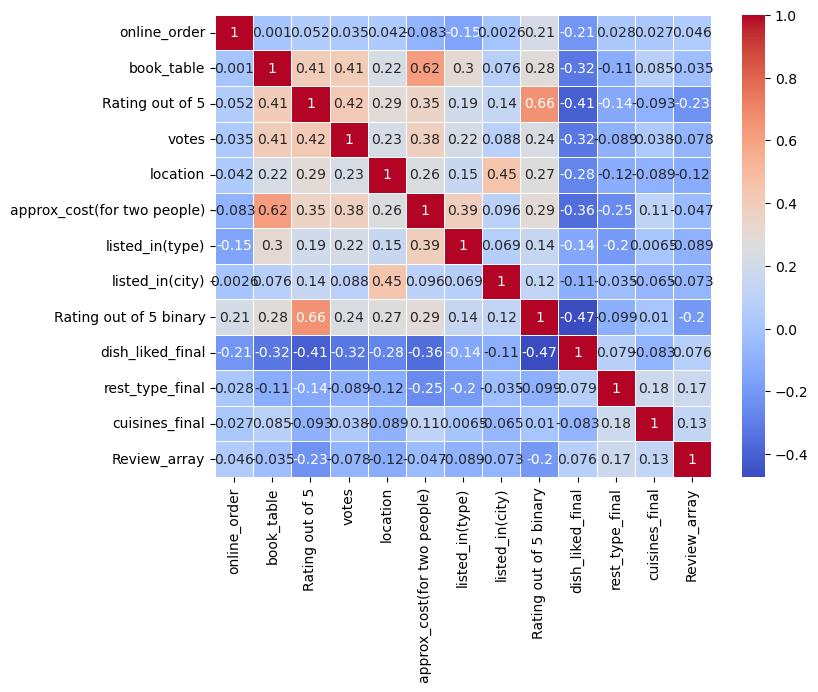

In [154]:
correlation_matrix = df_with_array.corr()
# Set the size of the heatmap
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()


# Model Training Part

In [155]:
def convert_string_to_float(value):
    if isinstance(value, str):
        return float(value.replace(',', ''))
    return value

# Apply the function to each element in the DataFrame
df_with_array = df_with_array.applymap(convert_string_to_float)
df_with_array.dtypes

online_order                     int64
book_table                       int64
Rating out of 5                float64
votes                            int64
location                       float64
approx_cost(for two people)    float64
listed_in(type)                float64
listed_in(city)                float64
Rating out of 5 binary           int64
dish_liked_final                 int64
rest_type_final                float64
cuisines_final                 float64
Review_array                   float64
dtype: object

In [160]:
X_training=df_with_array.loc[:,['online_order', 'book_table', 'votes', 'location',
       'rest_type_final', 'cuisines_final', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)','dish_liked_final']]
Y=df_with_array.loc[:,['Rating out of 5']]

In [161]:
X_training

online_order  book_table  votes  location  rest_type_final  \
0                 1           1    775  0.657837           1.3057   
1                 1           0    787  0.657837           1.3057   
2                 1           0    918  0.657837           1.8131   
3                 0           0     88  0.657837           2.0639   
4                 0           0    166  0.694444           1.3057   
...             ...         ...    ...       ...              ...   
51712             0           0     27  0.526119           0.2457   
51713             0           0      0  0.526119           0.2457   
51714             0           0      0  0.526119           0.2457   
51715             0           1    236  0.460177           0.2457   
51716             0           0     13  0.460177           1.5514   

       cuisines_final  approx_cost(for two people)  listed_in(type)  \
0              3.8202                        800.0         0.884354   
1              3.7632                        800.0         0.884354   
2              0.9231                        800.0         0.884354   
3              2.9729                        300.0         0.884354   
4              2.1268                        600.0         0.884354   
...               ...                          ...              ...   
51712          0.5765                       1500.0         0.860832   
51713          0.1219                        600.0         0.860832   
51714          0.1219                       2000.0         0.860832   
51715          0.1219                       2500.0         0.860832   
51716          2.8069                       1500.0         0.860832   

       listed_in(city)  dish_liked_final  
0             0.676709              4330  
1             0.676709              3513  
2             0.676709              1106  
3             0.676709               700  
4             0.676709               475  
...                ...               ...  
51712         0.519753             28078  
51713         0.519753             28078  
51714         0.519753             28078  
51715         0.519753              6013  
51716         0.519753             28078  

[51717 rows x 10 columns]

In [162]:
Y

Rating out of 5
0             4.100000
1             4.100000
2             3.800000
3             3.700000
4             3.800000
...                ...
51712         3.600000
51713         3.710789
51714         3.710789
51715         4.300000
51716         3.400000

[51717 rows x 1 columns]

In [163]:
Y=Y.values.ravel()

In [164]:
Y = Y.reshape(-1)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_training,Y,test_size=0.33,random_state=42)

In [166]:
X_train

online_order  book_table  votes  location  rest_type_final  \
1944              0           0      0  0.569477           0.1471   
22091             1           0    258  0.475460           2.0639   
41154             1           0     61  0.510834           0.4641   
50595             0           0      0  0.526119           0.6798   
18870             1           0   1391  0.755161           2.0639   
...             ...         ...    ...       ...              ...   
11284             0           0     29  0.621879           1.3057   
44732             1           1     97  0.755161           1.3057   
38158             1           1    457  0.832994           1.3057   
860               0           0      0  0.657837           0.2457   
15795             0           1    174  0.618779           1.5514   

       cuisines_final  approx_cost(for two people)  listed_in(type)  \
1944           1.0380                        200.0         0.637907   
22091          1.0105                        500.0         0.603076   
41154          1.5547                        650.0         0.603076   
50595          0.9566                        150.0         0.603076   
18870          1.4852                        600.0         0.605377   
...               ...                          ...              ...   
11284          2.7180                        600.0         0.605377   
44732          2.7577                       1200.0         0.884354   
38158          1.6547                       1000.0         0.603076   
860            0.9315                        500.0         0.896458   
15795          2.8974                       1500.0         0.884354   

       listed_in(city)  dish_liked_final  
1944          0.540507             28078  
22091         0.604962              3747  
41154         0.509946              2359  
50595         0.519753             28078  
18870         0.680645              3244  
...                ...               ...  
11284         0.634035             28078  
44732         0.644912              2125  
38158         0.656537              3975  
860           0.676709             28078  
15795         0.604825              5883  

[34650 rows x 10 columns]

In [167]:
X_test

online_order  book_table  votes  location  rest_type_final  \
8440              1           0    179  0.569477           2.0639   
23575             1           0    165  0.475460           2.0639   
16711             0           0     23  0.621879           2.0639   
42588             0           0      8  0.681329           2.0639   
5266              1           0     43  0.681329           0.1471   
...             ...         ...    ...       ...              ...   
24705             1           1     24  0.710434           1.3057   
44943             1           0    112  0.489691           2.0639   
7154              1           0     56  0.510834           1.3057   
44117             1           0     70  0.599384           0.3211   
49696             0           0      0  0.618779           1.3057   

       cuisines_final  approx_cost(for two people)  listed_in(type)  \
8440           0.8231                   250.000000         0.603076   
23575          3.1183                   450.000000         0.605377   
16711          2.1085                   555.431566         0.603076   
42588          3.6632                   200.000000         0.603076   
5266           0.6521                   150.000000         0.603076   
...               ...                          ...              ...   
24705          0.0139                   850.000000         0.605377   
44943          3.5673                   500.000000         0.603076   
7154           3.6632                   600.000000         0.603076   
44117          0.1774                   250.000000         0.603076   
49696          4.7036                   600.000000         0.605377   

       listed_in(city)  dish_liked_final  
8440          0.634035               902  
23575         0.604962             28078  
16711         0.604825             28078  
42588         0.682496             28078  
5266          0.690786             28078  
...                ...               ...  
24705         0.595111             28078  
44943         0.644912              2780  
7154          0.540184              2958  
44117         0.559459             28078  
49696         0.559873             28078  

[17067 rows x 10 columns]

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [170]:
X_train_scaled

array([[-1.19648608, -0.37610469, -0.34619395, ...,  0.15105408,
        -1.47270226,  0.90436693],
       [ 0.83578072, -0.37610469, -0.02978732, ..., -0.34913903,
        -0.3746646 , -1.09367336],
       [ 0.83578072, -0.37610469, -0.27138463, ..., -0.34913903,
        -1.99333947, -1.2076547 ],
       ...,
       [ 0.83578072,  2.65883417,  0.21426275, ..., -0.34913903,
         0.50395443, -1.0749502 ],
       [-1.19648608, -0.37610469, -0.34619395, ...,  3.86399609,
         0.84760835,  0.90436693],
       [-1.19648608,  2.65883417, -0.13280343, ...,  3.69017511,
        -0.37699883, -0.91826692]])

In [171]:
X_test_scaled=scaler.transform(X_test)

In [172]:
X_test_scaled

array([[ 0.83578072, -0.37610469, -0.12667152, ..., -0.34913903,
         0.12061606, -1.32730226],
       [ 0.83578072, -0.37610469, -0.14384087, ..., -0.31609477,
        -0.3746646 ,  0.90436693],
       [-1.19648608, -0.37610469, -0.31798716, ..., -0.34913903,
        -0.37699883,  0.90436693],
       ...,
       [ 0.83578072, -0.37610469, -0.27751654, ..., -0.34913903,
        -1.478199  , -1.15846535],
       [ 0.83578072, -0.37610469, -0.26034719, ..., -0.34913903,
        -1.14983387,  0.90436693],
       [-1.19648608, -0.37610469, -0.34619395, ..., -0.31609477,
        -1.14278689,  0.90436693]])

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
regressor=LinearRegression()
regressor.fit(X_train_scaled,Y_train)

LinearRegression()

In [175]:
Y_pred=regressor.predict(X_test_scaled)

In [176]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.33466487733135253

In [177]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.10453089058801998
RMSE: 0.3233123730821633


In [178]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [179]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [180]:
svm_regressor = SVR(kernel='linear', C=1.0)

# 5. Fit the SVM regressor to the training data
svm_regressor.fit(X_train_scaled, Y_train)

# 6. Make predictions
Y_pred = svm_regressor.predict(X_test_scaled)

# 7. Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.10821425052635451
Root Mean Squared Error: 0.3289593447925663


In [181]:
r2_score(Y_test,Y_pred)

0.3112204321284199

In [185]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor with specified hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=250, random_state=42,criterion='squared_error')
rf_regressor.fit(X_train_scaled, Y_train)
Y_pred = rf_regressor.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.014965223691480707
Root Mean Squared Error: 0.12233243106993627
R-squared (R2) Score: 0.9047469232824445


In [183]:
from sklearn.neighbors import KNeighborsRegressor
k = 5  # You can adjust this value
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the KNN Regressor to the training data
knn_regressor.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 0.07630374829755197
R-squared (R2) Score: 0.5143295589653412


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Gradient Boosting Regression
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_regressor.fit(X_train_scaled, Y_train)

# AdaBoost Regression
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_regressor.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred_gb = gradient_boosting_regressor.predict(X_test_scaled)
Y_pred_ab = adaboost_regressor.predict(X_test_scaled)

# Evaluate the models
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
r2_gb = r2_score(Y_test, Y_pred_gb)

mse_ab = mean_squared_error(Y_test, Y_pred_ab)
r2_ab = r2_score(Y_test, Y_pred_ab)

print("Gradient Boosting Regression:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R2) Score: {r2_gb}")

print("\nAdaBoost Regression:")
print(f"Mean Squared Error (MSE): {mse_ab}")
print(f"R-squared (R2) Score: {r2_ab}")